Neste notebook são feitas as primeiras análises exploratórias sobre criminologia na cidade de San Francisco - Califórnia

Dados tirados do Kaggle: https://www.kaggle.com/c/sf-crime/data

In [1]:
%pip freeze > requirements.txt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
#%pip freeze >

Primeira tabela não havia quase nada de dados

In [3]:
dadosCrime = pd.read_csv("/home/deia-silva/Documentos/UFLA/IC/AnaliseSF/sampleSubmission.csv")
dadosCrime.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- Peguei os dados do train.csv e coloquei em uma tabela do pandas
- usei o head para mostrar novamente os dados disponíveis

In [4]:
#observando o que tem na tabela
dadosCrime.describe()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
count,884262.000000,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,...,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0,884262.0
mean,442130.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,255264.596206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,221065.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,442130.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,663195.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,884261.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
dadosCrime2 = pd.read_csv("train.csv")
# .shape exibe o tamanho da tabela (linhas e colunas)
print('Tamanho:',dadosCrime2.shape)
dadosCrime2.head(10)

Tamanho: (878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [6]:
#retirei as colunas X e Y porque não irão ser usadas por enquanto
dadosCrime2 = dadosCrime2.drop(columns = ['X'])
dadosCrime2 = dadosCrime2.drop(columns = ['Y'])
dadosCrime2.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST


In [7]:
#mostra a quantidade total de linhas
dadosCrime.index

RangeIndex(start=0, stop=884262, step=1)

In [8]:
#verificando se existe algum valor nulo para ser tratado na tabela
dadosCrime2.isnull()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
878044,False,False,False,False,False,False,False
878045,False,False,False,False,False,False,False
878046,False,False,False,False,False,False,False
878047,False,False,False,False,False,False,False


In [9]:
# observando os tipos de dados que tenho
dadosCrime2.values

array([['2015-05-13 23:53:00', 'WARRANTS', 'WARRANT ARREST', ...,
        'NORTHERN', 'ARREST, BOOKED', 'OAK ST / LAGUNA ST'],
       ['2015-05-13 23:53:00', 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 'NORTHERN', 'ARREST, BOOKED',
        'OAK ST / LAGUNA ST'],
       ['2015-05-13 23:33:00', 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 'NORTHERN', 'ARREST, BOOKED',
        'VANNESS AV / GREENWICH ST'],
       ...,
       ['2003-01-06 00:01:00', 'LARCENY/THEFT',
        'GRAND THEFT FROM LOCKED AUTO', ..., 'SOUTHERN', 'NONE',
        '5TH ST / FOLSOM ST'],
       ['2003-01-06 00:01:00', 'VANDALISM',
        'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', ..., 'SOUTHERN',
        'NONE', 'TOWNSEND ST / 2ND ST'],
       ['2003-01-06 00:01:00', 'FORGERY/COUNTERFEITING',
        'CHECKS, FORGERY (FELONY)', ..., 'BAYVIEW', 'NONE',
        '1800 Block of NEWCOMB AV']], dtype=object)

In [10]:
#total de valores não repetidos
dadosCrime2.nunique()

Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
dtype: int64

In [19]:
dadosCrime2.groupby('Category').count()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address
Category,,,,,,
ARSON,1513,1513,1513,1513,1513,1513
ASSAULT,76876,76876,76876,76876,76876,76876
BAD CHECKS,406,406,406,406,406,406
BRIBERY,289,289,289,289,289,289
BURGLARY,36755,36755,36755,36755,36755,36755
DISORDERLY CONDUCT,4320,4320,4320,4320,4320,4320
DRIVING UNDER THE INFLUENCE,2268,2268,2268,2268,2268,2268
DRUG/NARCOTIC,53971,53971,53971,53971,53971,53971
DRUNKENNESS,4280,4280,4280,4280,4280,4280


In [14]:
#se eu queiser pegar os indices
#dadosCrime2.Category.value_counts().index

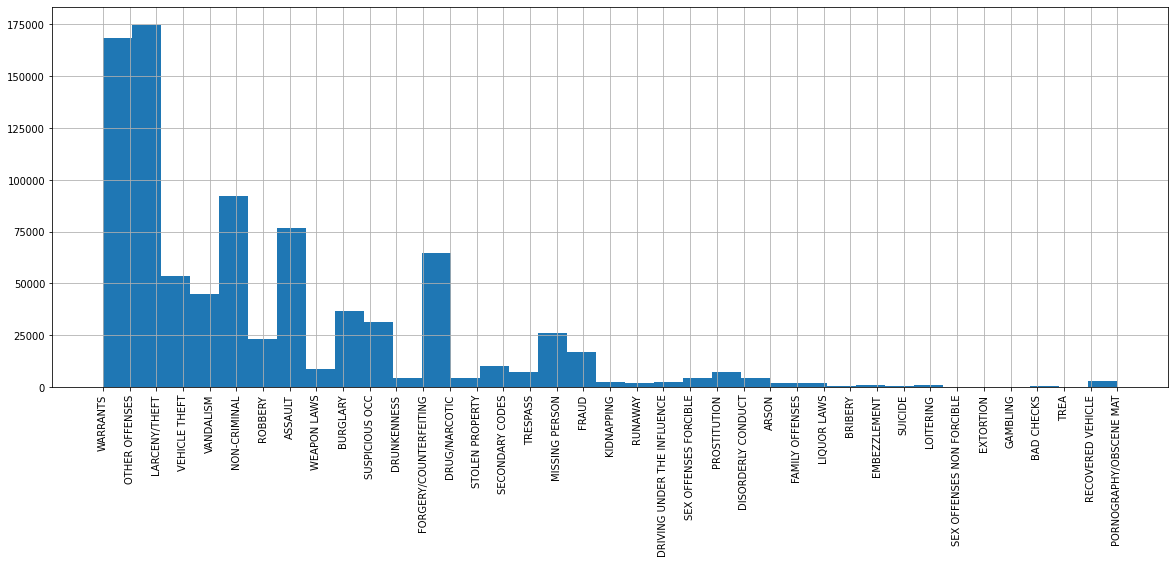

In [24]:
#dadosCrime2.groupby("Category",axis = ["Dates"].hist()
#dadosCrime2.groupby('Category').[categoria] dados.groupby('Bairro')['Valor'].mean()"order", axis="columns")
dadosCrime2.Category.hist(bins = 35)
plt.rcParams['figure.figsize'] = (20,7)
plt.xticks(rotation = 90)
plt.show()

In [25]:
#peguei as categorias de crime e coloquei em uma variável separada para fazer a contagem
tiposCrime = dadosCrime2['Category']
tiposCrime
#total = tiposCrime.nunique()
#for x in tiposCrime:
#    descricaoCrimes = tiposCrime
#descricaoCrimes.head(15)

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
                   ...          
878044                   ROBBERY
878045             LARCENY/THEFT
878046             LARCENY/THEFT
878047                 VANDALISM
878048    FORGERY/COUNTERFEITING
Name: Category, Length: 878049, dtype: object

In [ ]:
#contando a quantidade de crimes de acordo com a descrição
#sort_index() organiza em ordem alfabética
tiposCrime.value_counts().sort_index()

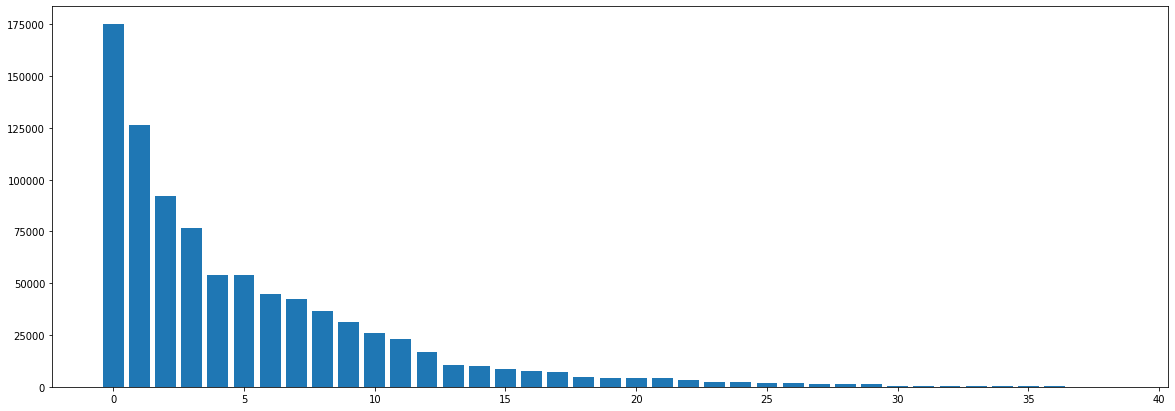

In [26]:
#para cada x eu recebo a posicao correspondente para poder fazer o gráfico
ids = [x for x in range(len(tiposCrime.value_counts()))]
plt.bar(ids,tiposCrime.value_counts())
plt.show()

In [27]:
#melhorando o gráfico, estou pegando os índices e calculando a quantidade total de cada índice
categoria = dadosCrime2.Category.value_counts().index
x = tiposCrime.value_counts()

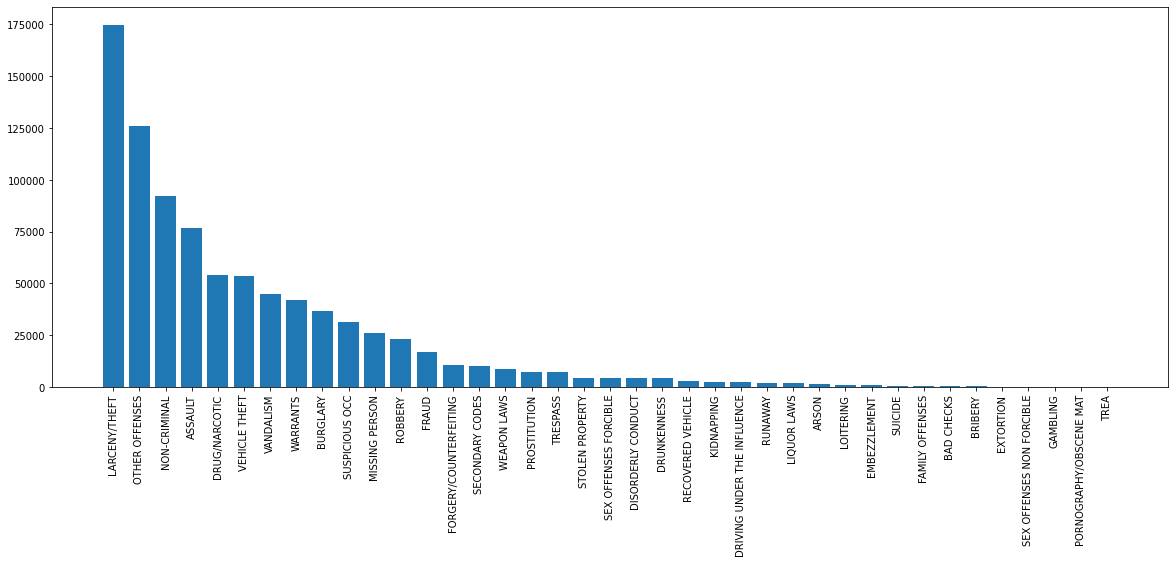

In [28]:
plt.rcParams['figure.figsize'] = (20,7)
plt.xticks(rotation=90)
plt.bar(categoria,x)
plt.show()

In [29]:
#Dias da semana que mais acontecem crimes
diaSemana = dadosCrime2.DayOfWeek.value_counts().index
y = dadosCrime2['DayOfWeek'].value_counts()
print(diaSemana)
y

Index(['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Tuesday', 'Monday',
       'Sunday'],
      dtype='object')


Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
plt.bar(diaSemana,y)
plt.show()

In [ ]:
#Região onde ocorre mais crimes
regiao = dadosCrime2.PdDistrict.value_counts().index
b = dadosCrime2.PdDistrict.value_counts()
b

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
plt.xticks(rotation=40)
plt.bar(regiao,b)
plt.show()

In [ ]:
#Quero encontrar rua que mais ocorre crime
indicesAdress = dadosCrime2.Address.value_counts().index
crimeAdress = dadosCrime2['Address'].value_counts()
crimeAdress[0:20] #listei as 20 ruas que mais ocorre crime
#plt.rcParams['figure.figsize'] = (7,5)
#plt.xticks(rotation = 40)
#plt.bar(indicesAdress,crimeAdress)
#plt.show()